In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams['figure.figsize'] = [7, 7]
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})
import seaborn as sns

In [90]:
sns.set(style='whitegrid', font_scale=1.4, rc={"lines.linewidth": 1.5,'lines.markersize': 4.0, 'axes.facecolor': 'white'}, font="serif")

In [3]:
import pickle
import numpy as np
from orphics.stats import FisherMatrix
from six.moves import configparser
import six

if six.PY2:
    ConfigParser = configparser.SafeConfigParser
else:
    ConfigParser = configparser.ConfigParser

In [4]:
fisherfile = '../datatest/fisher_dc_updated_abund-clustering_2018-11-23-16-13-15-EST.pkl'
oldfisherfile = '../data/savedFisher_S4-1.0-CDT_grid-owl2_owl2_v0.7_planck_mwwcdm_py3.pkl'
paramsfile = '../datatest/S4-1.0-CDT_grid-owl2_v0.6_params_2018-11-20-11-42-30-EST.npy'
fisherfile_ab = '../datatest/fisher_dc_updated_abund-clustering_abias_2018-11-28-16-40-01-EST.pkl'
paramsfile_ab = '../datatest/S4-1.0-CDT_grid-owl2_v0.6_params_2018-11-27-15-10-26-EST.npy'

params = np.load(paramsfile).item()
params_ab = np.load(paramsfile_ab).item()

with open(fisherfile, 'rb') as pickle_file:
    fisher = pickle.load(pickle_file)

with open(fisherfile_ab, 'rb') as pickle_file:
    fisher_ab = pickle.load(pickle_file)
    
with open(oldfisherfile, 'rb') as pickle_file:
    oldfisher = pickle.load(pickle_file)

In [5]:
fisher = FisherMatrix(fisher.values, fisher.columns.values)
fisher_ab = FisherMatrix(fisher_ab.values, fisher_ab.columns.values)

/Users/dylan/Development/orphics/orphics/stats.py:203: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [6]:
oldfisher = FisherMatrix(oldfisher[1], oldfisher[0])

In [7]:
constraints = fisher.sigmas()
constraints_ab = fisher_ab.sigmas()
oldconstraints = oldfisher.sigmas()

In [8]:
def _get_latex_params(inifile):
    config = ConfigParser()
    config.optionxform=str
    config.read(inifile)

    latex_param_list = config.items('fisher-clustering', 'paramLatexList')[1][1].split(',')
    return latex_param_list

INI = '../input/pipeline.ini'

latex_params = _get_latex_params(INI)
latex_paramdict = {}
for index,key in enumerate(params):
    latex_paramdict[key] = latex_params[index]

In [9]:
params_to_plot = ['H0', 'mnu', 'ombh2', 'omch2', 'w0', 'wa', 'ns']
constraints_to_plot = [constraints[par] for par in params_to_plot]
latex_to_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_plot]

In [10]:
import pandas as pd

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz

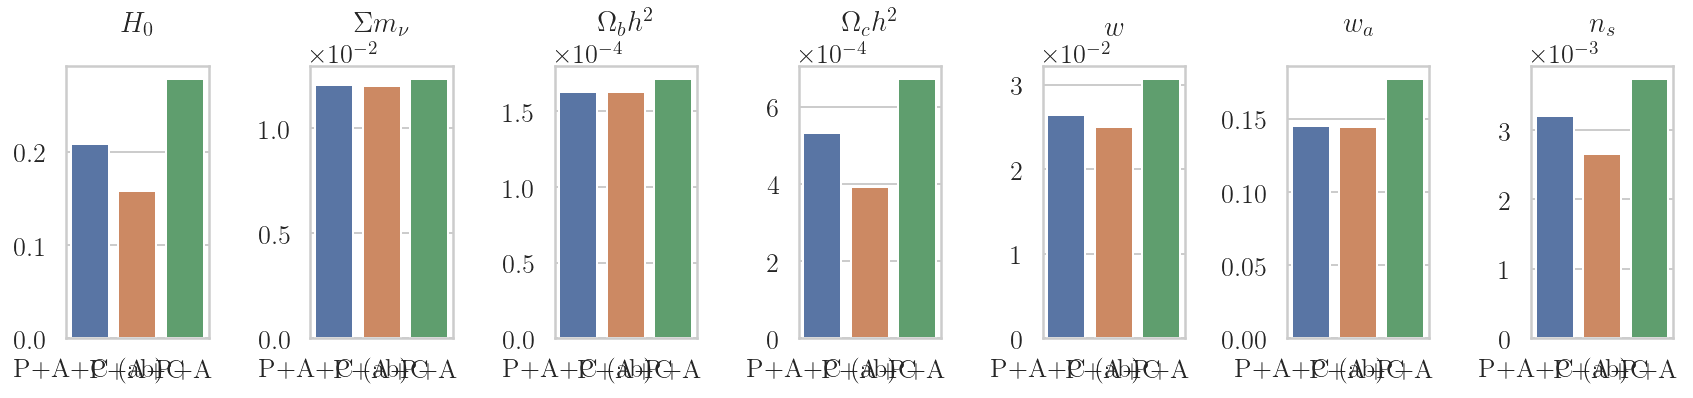

In [11]:
fig,axes = plt.subplots(1,len(params_to_plot), figsize=(12, 3))

for index,param in enumerate(params_to_plot):
    latex = '$' + latex_paramdict[param] + '$'
    names = ['P+A+C (ab)','P+A+C', 'P+A']
    sigmas = np.array([constraints_ab[param],constraints[param], oldconstraints[param]])
    df = pd.DataFrame({'names':names, 'sigmas':sigmas})
    sns.barplot(x="names", y="sigmas", data=df, ax=axes[index])
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')
    axes[index].set_title(latex, pad=15)
    
fig = plt.gcf()
fig.tight_layout()
#fig.savefig('barplot.eps')

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


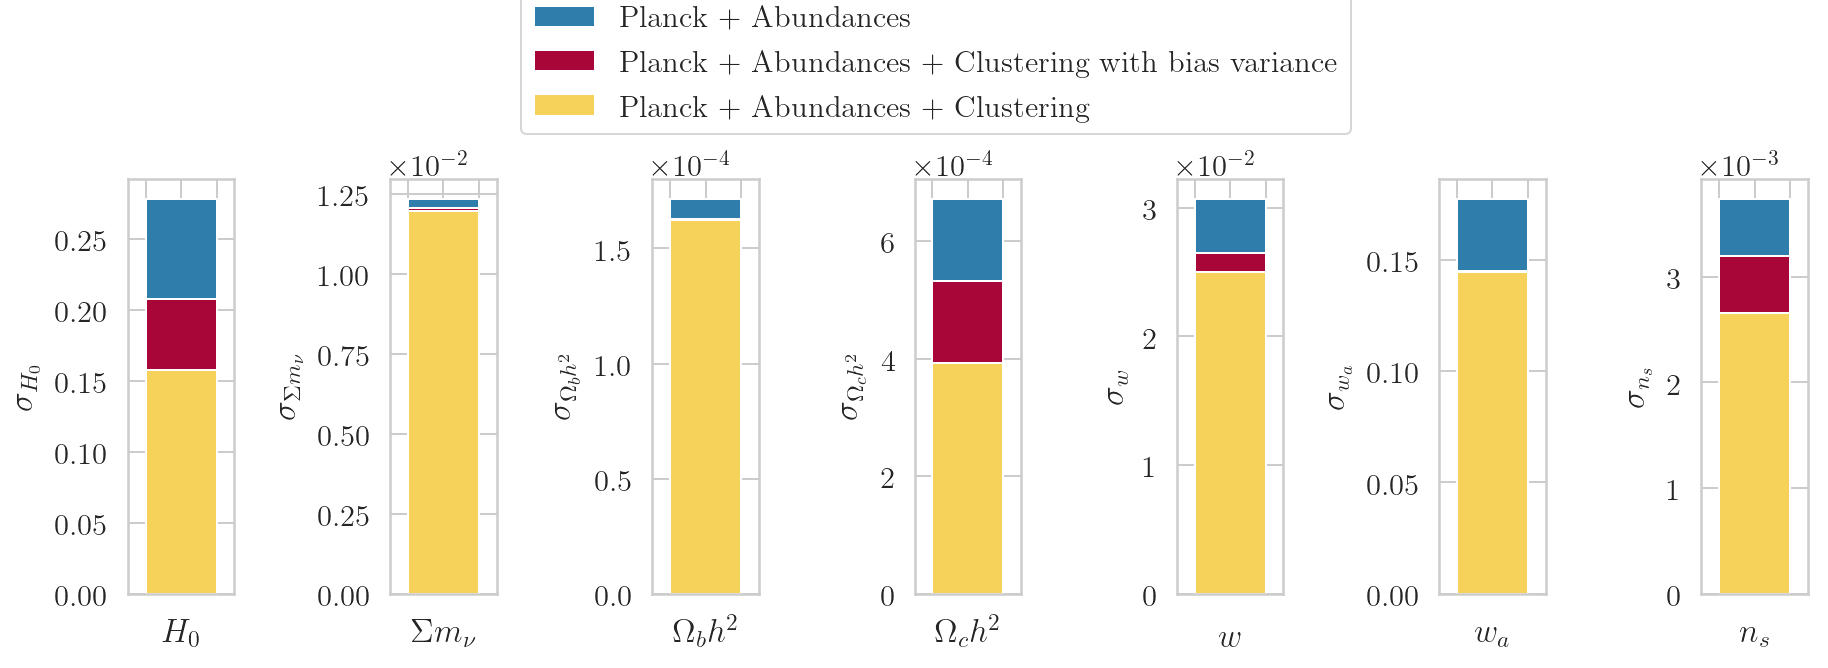

In [101]:
fig,axes = plt.subplots(1,len(params_to_plot), figsize=(13, 4))

for index,param in enumerate(params_to_plot):
    latex = '$' + latex_paramdict[param] + '$'
    wth = 1
    sigmas = np.array([constraints_ab[param],constraints[param], oldconstraints[param]])
    axes[index].bar(0, oldconstraints[param], width=wth, label='Planck + Abundances'
                    , color='#2e7daa')
    axes[index].bar(0, constraints_ab[param], width=wth, 
                    label='Planck + Abundances + Clustering with bias variance', color='#a80639')
    axes[index].bar(0, constraints[param], width=wth, 
                    label='Planck + Abundances + Clustering', color='#f7d25b')

    axes[index].set_xlabel(latex)
    axes[index].xaxis.set_ticks_position('none') 
    axes[index].set_xticklabels([])
    axes[index].set_xlim(-(wth + wth/2)/2 , (wth + wth/2)/2)
    axes[index].set_ylabel(r'$\sigma_{'+latex_paramdict[param]+'}$')
    
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9))
fig.tight_layout()
#fig.savefig('barplot.eps', bbox_inches='tight')

In [15]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir+'/bin') 
from deeos_to_gamma import get_gamma_constraint

In [20]:
sigma_gamma_old = get_gamma_constraint(oldfisher, oldfisher.columns.values)
sigma_gamma = get_gamma_constraint(fisher, fisher.columns.values)
sigma_gamma_ab = get_gamma_constraint(fisher_ab, fisher_ab.columns.values)

/Users/dylan/Development/orphics/orphics/stats.py:203: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


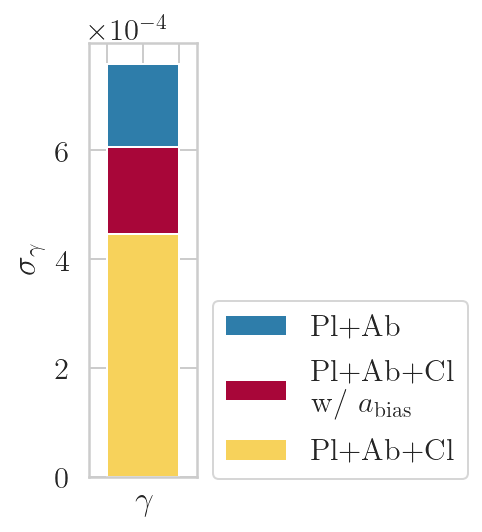

In [107]:
wth = 1
plt.bar(0, sigma_gamma_old, width=1, label='Pl+Ab'
                    , color='#2e7daa')
plt.bar(0, sigma_gamma_ab, width=wth, 
                label='Pl+Ab+Cl \n w/ $a_\mathrm{bias}$', color='#a80639')
plt.bar(0, sigma_gamma, width=wth, 
                label='Pl+Ab+Cl', color='#f7d25b')
plt.xlabel(r'$\gamma$')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlim(-(wth + wth/2)/2 , (wth + wth/2)/2)
plt.ylabel(r'$\sigma_{\gamma}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
fig = plt.gcf()
fig.set_size_inches(13/7 + 1.8,4)
fig.tight_layout()
#fig.savefig('gamma_barplot.svg', bbox_inches='tight')